### Gradient descent (missed part of 1st lesson)

Gradient descent is a first-order iterative optimization algorithm for finding the minimum of a function. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient (or of the approximate gradient) of the function at the current point. 

##### Keypoint: Optimization(maximization/minimization) for our target function

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/0154a26cc6ac60465f8eb3d00d2f2dfa6899da2a"/>

$\nabla$ (nabla) is derivative

### How optimization looks like? Let's plot it and look

<img src="https://sebastianraschka.com/images/faq/closed-form-vs-gd/ball.png"/ height=600 width=600>

### Another picture 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Gradient_descent.svg/955px-Gradient_descent.svg.png" height=400 width=400/>

### Logistic regression

Logistic regression is named for the function used at the core of the method, the logistic function.
Logistic regression uses an equation as the representation, very much like linear regression. Input values (X) are combined linearly using weights or coefficient values to predict an output value (y).
A key difference from linear regression is that the output value being modeled is a binary value (0 or 1) rather than a numeric value.

##### Keypoint: Same stuff as Linear regression, but we will use different hypothesis and loss functions, because we will be predicting not continuous values, but labels

<img src="https://cdn-images-1.medium.com/max/455/1*snTXFElFuQLSFDnvZKJ6IA.png"/>

#### And that's ok

An explanation of logistic regression can begin with an explanation of the standard logistic function. The logistic function is useful because it can take any real input  t, whereas the output always takes values between zero and one and hence is interpretable as a probability. The logistic function is defined as follows:
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/5e648e1dd38ef843d57777cd34c67465bbca694f"/>
Plot the function
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/640px-Logistic-curve.svg.png"/ height=400 width=400>

Our hypothesis function will be the same, but we have to wrap the result into logistic funciton:

**Old function (for linear regression)**:  $h_{\theta} = \theta^{T} x$

**New funciton (for logistic regression)**: $h_{\theta} = g(\theta^{T} x$)

##### Let's define python function for that

In [3]:
def h(theta, x):
    a = 1 / (1 + np.exp(-np.dot(theta, x.T)))
    if a is np.array:
        #Prevent 0's and inf under log function
        a[np.where(a == 0)] = 10 ** -9
        a[np.where(a == 1)] = 0.999999
    return a

##### Now we have $\theta$, but what about $J(\theta)$, out cost function.

Our loss funciton is called **log loss (for binary classification)**.

<img src="https://i.stack.imgur.com/sMNpx.jpg" height=400 width=400/>

To minimize it, we will use ... gradient descent!


Let's simplify it and write as one equation + compute the derivative.

<img src="https://datascienceplus.com/wp-content/uploads/2017/02/4-490x233.png" height=650 width=650/>






#### Now we are ready to define train function for our logistic regression!

In [4]:
def train(x, y, lr=0.01, iter=10000, rr=0):
    m, features = x.shape
    theta = np.zeros(features + 1, dtype=np.float128)
    # adding bias
    x_bias = np.column_stack((np.ones(m), x))
    costs = []
    for i in range(iter):
        cost = lr * np.sum(np.dot(-y, np.log(h(theta, x_bias))) - \
                           np.dot((1 - y), np.log(1 - h(theta, x_bias)))) + \
               (rr / (2 * m)) * np.sum(theta[1:] ** 2)
        costs = [*costs, cost]
        theta_update = (lr * np.sum((h(theta, x_bias) - y) * x_bias.T, axis=1))
        theta_regularization = (rr / m) * theta
        theta_regularization[0] = 0
        theta = theta - (theta_update + theta_regularization)
    return theta, costs

#### And this won't work :( 

<img src="http://i.imgur.com/kJlYN0w.jpg" height=400 width=400/>

<img src="https://i.imgflip.com/1xh4st.jpg" height=400 width=400/>

#### What the hell and why we need it

* We can speed up gradient descent by having each of our input values in roughly the same range. 

* Overflow/underflow (not really the case, but helps)

* Different ranges of features can affect prediction models (as example SVM)

<img src="https://qph.ec.quoracdn.net/main-qimg-0d692d88876aeb26b1f1a578d1c5a94e" width=400 height=400/>

In [5]:
def normalize(x):
    m, features = x.shape
    for i in range(features):
        x[0:, i] = (x[0:, i] - x[0:, i].min()) / (x[0:, i].max() - x[0:, i].min())

    return x

#### Ok. Now we have everything to start doing classification 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
#Reading the data from file.
data = np.genfromtxt("l2_data.txt", delimiter=",", dtype=np.float128)

In [7]:
#Split data function + normalization for X (we don't need to normalize Y, because it's our labels)
def split_data(data):
    examples, features = data.shape
    # features - 1 because last column is value we are trying to predict
    x, y = (normalize(data[0:, :features - 1]), data[0:, features - 1])
    return x, y

x, y = split_data(data)

In [8]:
print("First example:", x[0], "Label:", y[0])

First example: [ 0.065427839  0.69465488] Label: 0.0


In [9]:
#Train the regression!
theta, costs = train(x, y)

In [10]:
#Predict function for logistic regression
def predict(theta, x):
    m, features = x.shape
    x_bias = np.column_stack((np.ones(m), x))
    y = h(theta, x_bias)
    return y
predicted = predict(theta, x)

In [11]:
#Define confidense for labeling. We will take 0.5 (if x > 0.5 then y = 1, if x < 0.5 then y = 0)
conf = 0.5
accuracy = (((predicted > conf).astype(int)) == y).sum() / len(y)

In [12]:
print("Accuracy:", accuracy)

Accuracy: 0.89


In [13]:
#Plotting stuff
def get_bound(theta):
    pts = []
    for i in np.arange(0.0, 1.0, 0.005):
        for j in np.arange(0.0, 1.0, 0.005):
            a = h(theta, np.array([1, i, j]))
            if 0.69 < a < 0.7:
                pts = [*pts, (i, j)]
    points = np.array(pts)
    if len(points) == 0:
        return np.array([[1], [1]])
    return points[0:, 0], points[0:, 1]


def plot_data(data, predicted, costs, bound):
    x, y = data
    xb, yb = bound
    fig, (g1, g2, g3) = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))
    g1.plot(x[np.where(y == 1)][0:, 0], x[np.where(y == 1)][0:, 1], 'o', markersize=3)
    g1.plot(x[np.where(y == 0)][0:, 0], x[np.where(y == 0)][0:, 1], 'x', markersize=3)
    g1.plot(xb, yb, 'o', markersize=1)

    g2.plot(x[np.where(predicted > 0.5)][0:, 0], x[np.where(predicted > 0.5)][0:, 1], 'o', markersize=3)
    g2.plot(x[np.where(predicted <= 0.5)][0:, 0], x[np.where(predicted <= 0.5)][0:, 1], 'x', markersize=3)
    g2.plot(xb, yb, 'o', markersize=1)

    g1.axis([x.min() - x.mean(), x.max() + x.mean(), x.min() - x.mean(), x.max() + x.mean()])
    g2.axis([x.min() - x.mean(), x.max() + x.mean(), x.min() - x.mean(), x.max() + x.mean()])

    g3.plot(costs)
    plt.show()

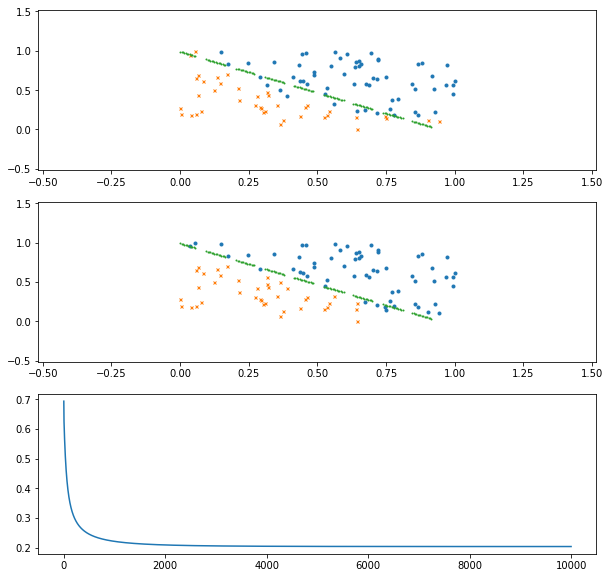

In [14]:
%matplotlib inline
#Let's plot the result!
bound = get_bound(theta)
plot_data((x, y), predicted, costs, bound)

### Ok, but lines are 
<img src="https://s-media-cache-ak0.pinimg.com/originals/34/93/dc/3493dc19e179b65c34408a88c19140d8.png" height=400 width=400/>

### Let's do some more interesting!

In [15]:
#Reading data2 (file is normalized itself)
data = np.genfromtxt("l2_data_2.txt", delimiter=",", dtype=np.float128)

In [16]:
def plot_data_raw(data):
    plt.plot(data[np.where(data[:,2] == 1)][:,0], data[np.where(data[:,2] == 1)][:,1], 'o')
    plt.plot(data[np.where(data[:,2] == 0)][:,0], data[np.where(data[:,2] == 0)][:,1], 'o')
    plt.show()

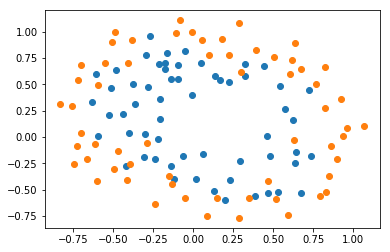

In [17]:
plot_data_raw(data)

Let's redefine some functions to work with this data. We will use feature enrichment (syntetic features) for our data!

What we will do is for x from input we will add it's power from 2 to some value(14 in this example)

So we will have something like this:

Initital: $(x_1, x_2)$

Resulting: $(x_1, x_1^2, x_1^3, x_1^4, x_1^5 ..., x_2, x_2^2, x_2^3, x_2^4, x_2^5 ...)$

In [46]:
def enrich_features(x, power=2):
    m, features = x.shape
    for p in range(2, power + 1):
        for f in range(features):
            x = np.append(x, np.power(x[0:, f], p).reshape(m, 1), axis=1)
    return x


def normalize(x):
    m, features = x.shape
    for i in range(features):
        x[0:, i] = (x[0:, i] - x[0:, i].min()) / (x[0:, i].max() - x[0:, i].min())

    return x


def split_data(data):
    examples, features = data.shape
    # features - 1 because last column is value we are trying to predict
    x, y = (enrich_features(normalize(data[0:, :features - 1])), data[0:, features - 1])
    return x, y

In [47]:
x, y = split_data(data)

In [48]:
#Train the regression!
theta, costs = train(x, y)

In [49]:
predicted = predict(theta, x)
accuracy = (((predicted > conf).astype(int)) == y).sum() / len(y)

In [50]:
print("Accuracy:", accuracy)

Accuracy: 0.805084745763


In [51]:
#Redefine plotting 
def get_bound(theta):
    pts = []
    for i in np.arange(0.0, 1.0, 0.005):
        for j in np.arange(0.0, 1.0, 0.005):
            a = h(theta, np.column_stack((np.ones(1), enrich_features(np.array([i, j]).reshape(1, 2)))))
            if 0.49 < a < 0.51:
                pts = [*pts, (i, j)]
    points = np.array(pts)
    if len(points) == 0:
        return np.array([[1], [1]])
    return points[0:, 0], points[0:, 1]


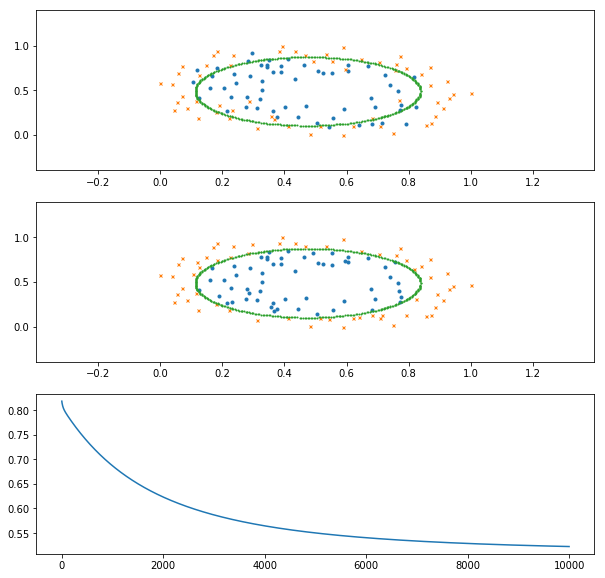

In [52]:
#Do the plotting!
bound = get_bound(theta)
plot_data((x, y), predicted, costs, bound)

<img src="https://media.giphy.com/media/nKG86WRlokFfW/giphy-facebook_s.jpg"/>